<a href="https://colab.research.google.com/github/edmbuya/Walmart-Sales-Forecasting-Trend-Analysis/blob/main/Walmart_Sales_Forecasting_%26_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle pandas sqlalchemy matplotlib seaborn scikit-learn statsmodels


In [3]:
!pip install kagglehub pandas sqlalchemy matplotlib seaborn scikit-learn statsmodels


In [4]:
import kagglehub

# Download latest version of the Walmart dataset
path = kagglehub.dataset_download("varsharam/walmart-sales-dataset-of-45stores")

print("Path to dataset files:", path)


100%|██████████| 122k/122k [00:00<00:00, 43.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/varsharam/walmart-sales-dataset-of-45stores/versions/1


In [5]:
import pandas as pd
import os

# Path to the extracted dataset
base_path = "/root/.cache/kagglehub/datasets/varsharam/walmart-sales-dataset-of-45stores/versions/1"

# Find CSV files
files = [f for f in os.listdir(base_path) if f.endswith(".csv")]
print("Available files:", files)

# Load the main dataset (it’s usually named 'Walmart_Store_sales.csv')
df = pd.read_csv(os.path.join(base_path, files[0]))
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nPreview:")
print(df.head())


Available files: ['walmart-sales-dataset-of-45stores.csv']
Shape: (6435, 8)

Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Preview:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [6]:
# Step 2: Data Cleaning

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Basic stats check
print("\nSummary statistics:")
print(df.describe())

# Add derived columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Confirm changes
print("\nData after cleaning:")
print(df.head())


Missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Duplicate rows: 0

Summary statistics:
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.66

/tmp/ipython-input-2855580631.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Weekly_Sales', data=sales_per_year, palette='Blues')
/tmp/ipython-input-2855580631.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=sales_per_store, palette='viridis')


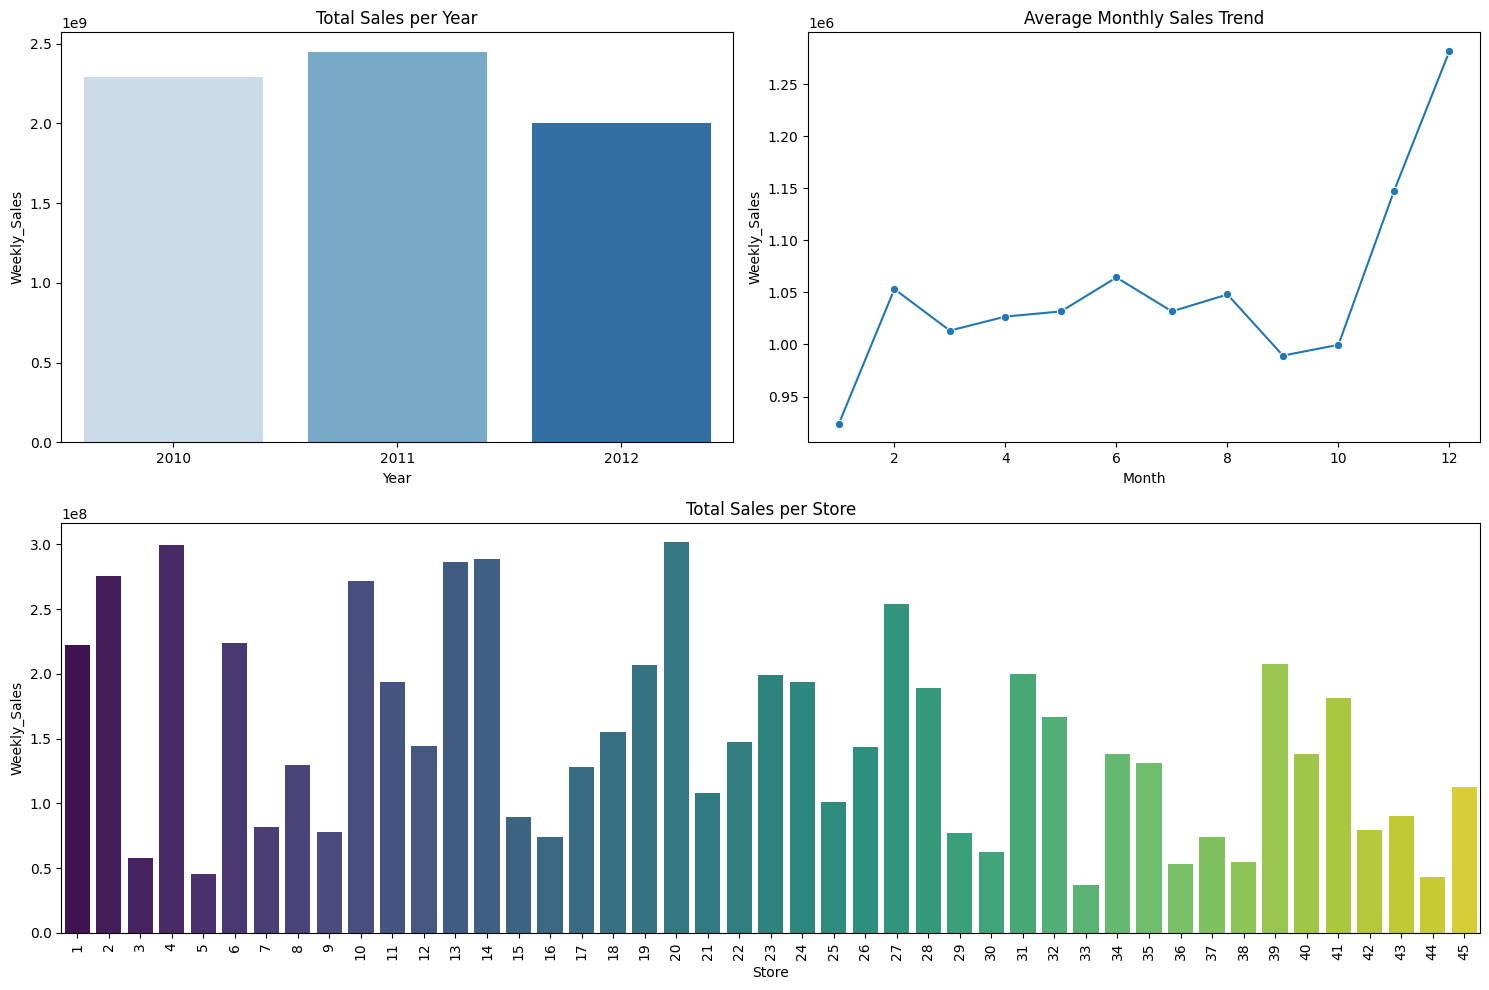

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total sales per year
sales_per_year = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

# 2. Total sales per month (aggregated across years)
sales_per_month = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# 3. Total sales per store
sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)

# --- Visualization ---
plt.figure(figsize=(15, 10))

# Yearly sales
plt.subplot(2, 2, 1)
sns.barplot(x='Year', y='Weekly_Sales', data=sales_per_year, palette='Blues')
plt.title("Total Sales per Year")

# Monthly trend
plt.subplot(2, 2, 2)
sns.lineplot(x='Month', y='Weekly_Sales', data=sales_per_month, marker='o')
plt.title("Average Monthly Sales Trend")

# Store performance
plt.subplot(2, 1, 2)
sns.barplot(x='Store', y='Weekly_Sales', data=sales_per_store, palette='viridis')
plt.title("Total Sales per Store")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


/tmp/ipython-input-4090902343.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Weekly_Sales', data=holiday_sales, palette='Set2')


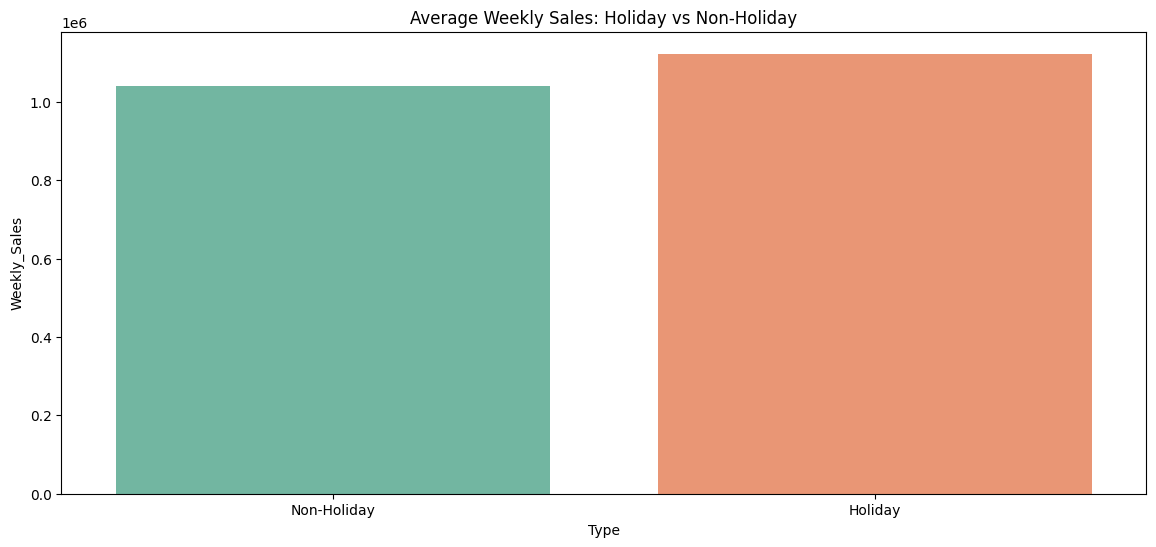

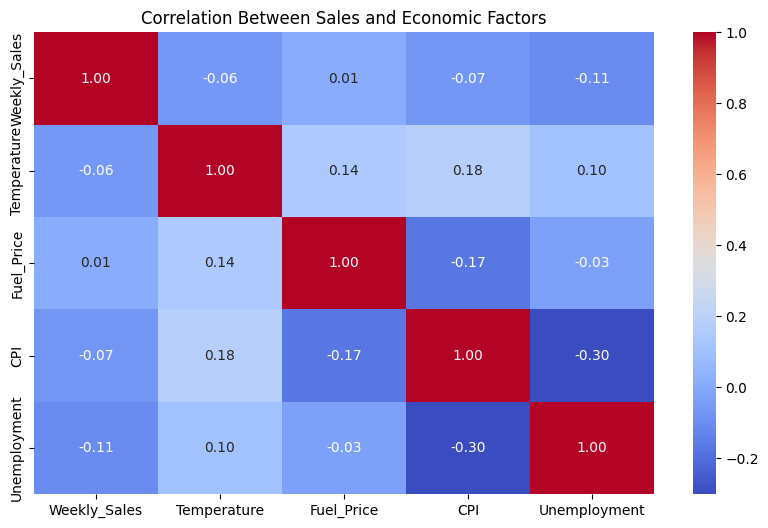

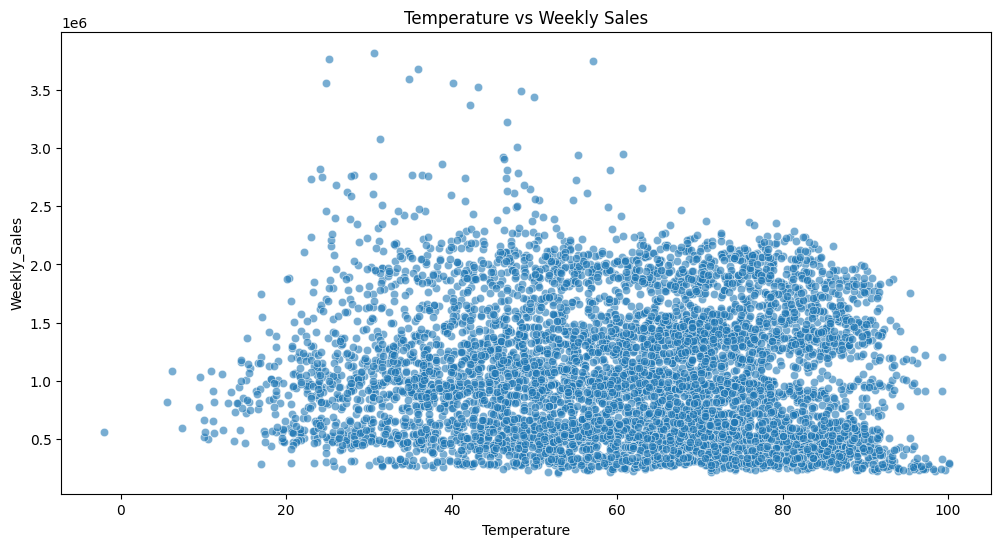

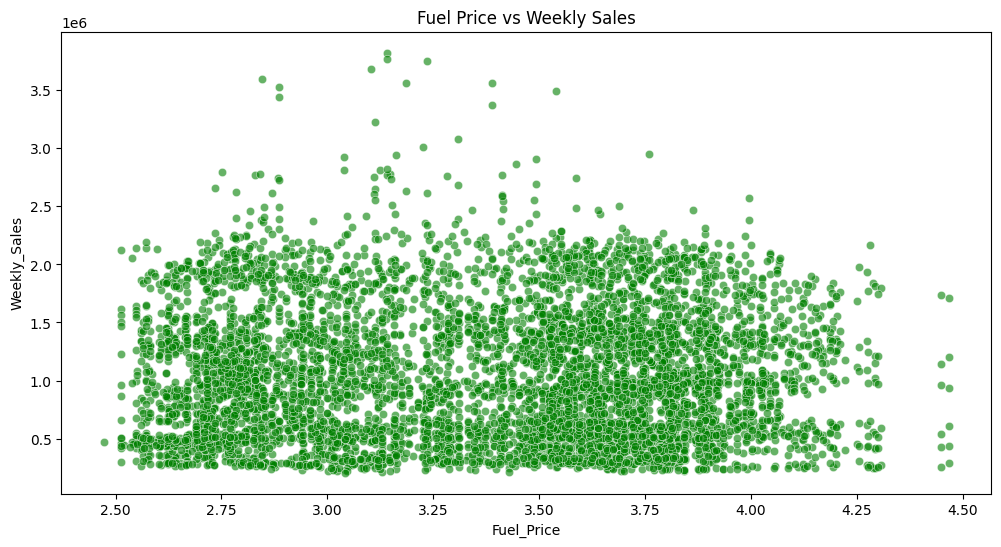

In [8]:
# --- Step 4: Holiday and Seasonal Impact Analysis ---
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Average weekly sales during holidays vs non-holidays
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales['Type'] = holiday_sales['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})

plt.figure(figsize=(14, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=holiday_sales, palette='Set2')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.show()


# 2️⃣ Correlation heatmap to see which factors impact sales most
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sales and Economic Factors")
plt.show()


# 3️⃣ Temperature vs Weekly Sales (seasonality insight)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.6)
plt.title("Temperature vs Weekly Sales")
plt.show()


# 4️⃣ Fuel Price vs Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.6, color='green')
plt.title("Fuel Price vs Weekly Sales")
plt.show()


/tmp/ipython-input-3194566010.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x='Store', y='sum', palette='cool')
/tmp/ipython-input-3194566010.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x='Store', y='mean', palette='viridis')


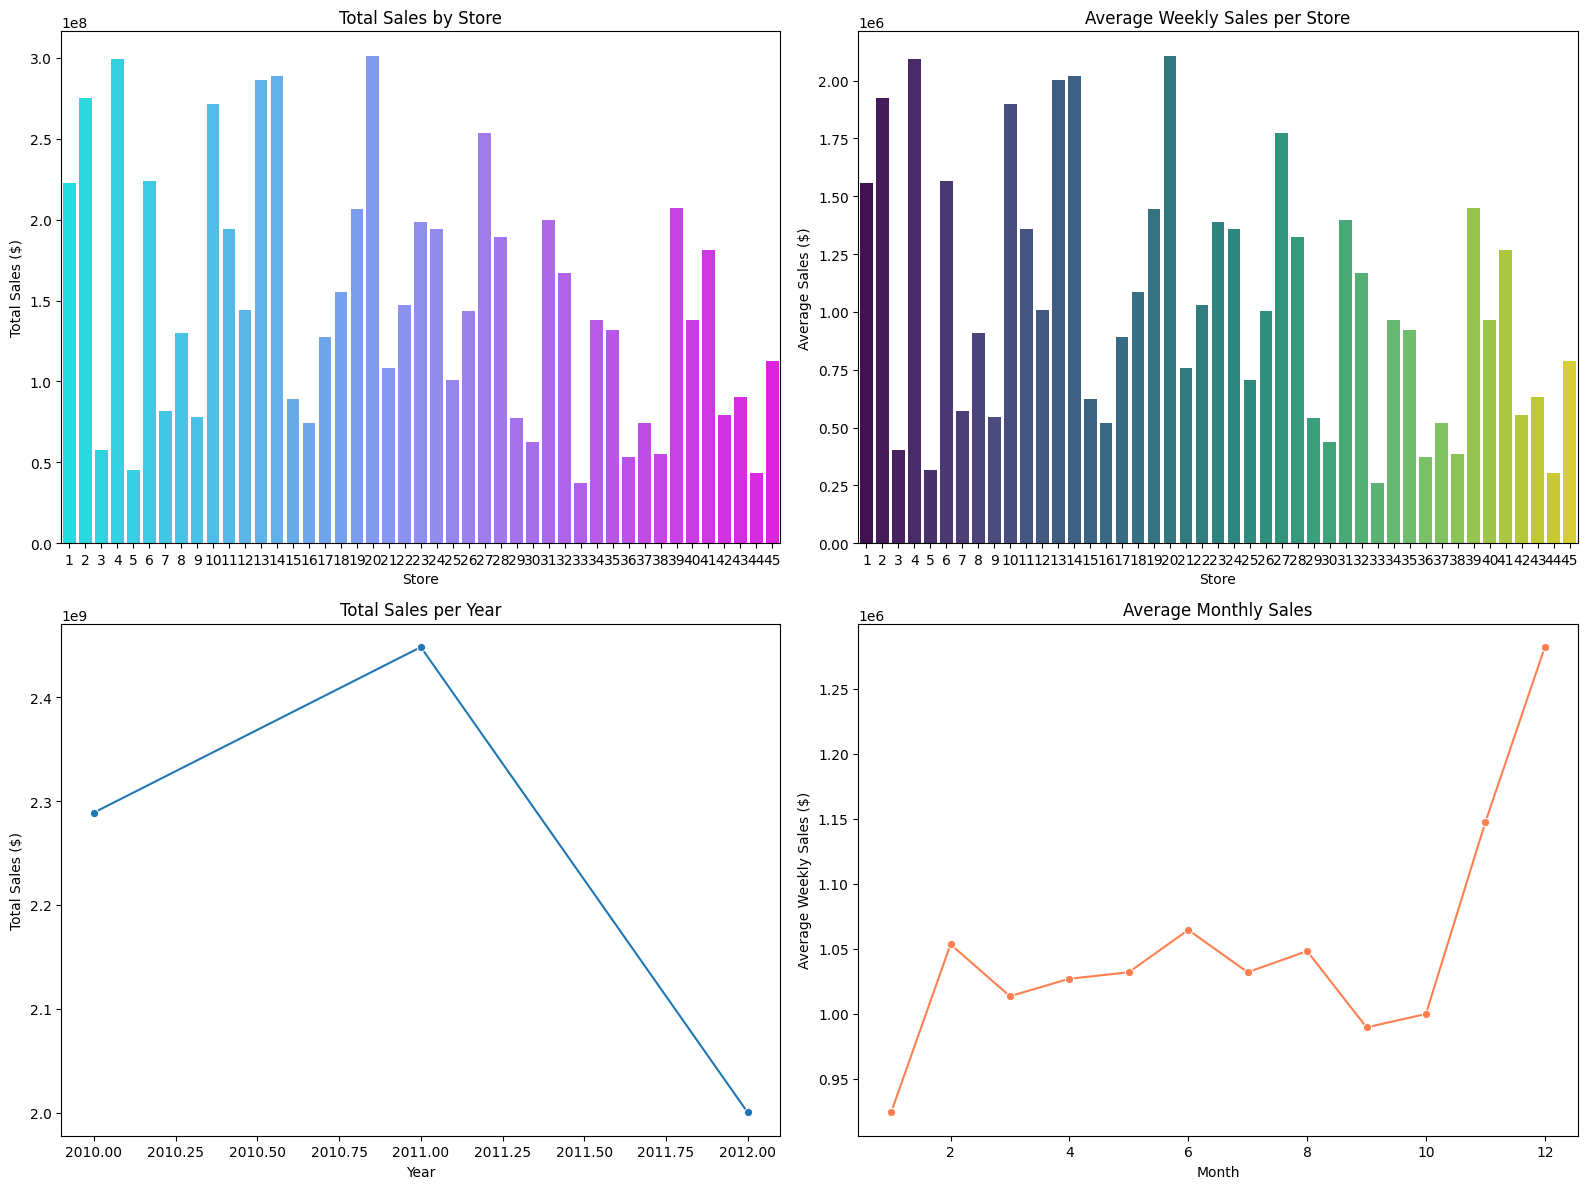

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume your DataFrame is named `df`
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1️⃣ Total and average sales by store
store_sales = df.groupby('Store')['Weekly_Sales'].agg(['sum', 'mean']).reset_index()

# 2️⃣ Sales trend by year
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

# 3️⃣ Average monthly sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# --- Visualization ---
plt.figure(figsize=(16, 12))

# Plot 1: Total sales by store
plt.subplot(2, 2, 1)
sns.barplot(data=store_sales, x='Store', y='sum', palette='cool')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')

# Plot 2: Average sales by store
plt.subplot(2, 2, 2)
sns.barplot(data=store_sales, x='Store', y='mean', palette='viridis')
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Sales ($)')

# Plot 3: Yearly sales trend
plt.subplot(2, 2, 3)
sns.lineplot(data=yearly_sales, x='Year', y='Weekly_Sales', marker='o')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')

# Plot 4: Monthly pattern
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', marker='o', color='coral')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')

plt.tight_layout()
plt.show()


In [10]:
!pip install prophet --quiet
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Prepare data for forecasting
df_prophet = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Sort by date
df_prophet = df_prophet.sort_values('ds')

print(df_prophet.head())


          ds            y
0 2010-02-05  49750740.50
1 2010-02-12  48336677.63
2 2010-02-19  48276993.78
3 2010-02-26  43968571.13
4 2010-03-05  46871470.30


In [12]:
# Initialize and fit the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l6ajo8a/nyfyfj6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l6ajo8a/3miuj3dn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51144', 'data', 'file=/tmp/tmp4l6ajo8a/nyfyfj6l.json', 'init=/tmp/tmp4l6ajo8a/3miuj3dn.json', 'output', 'file=/tmp/tmp4l6ajo8a/prophet_model_7guw2fy/prophet_model-20251026121932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Create a future dataframe for 1 year ahead (52 weeks)
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)


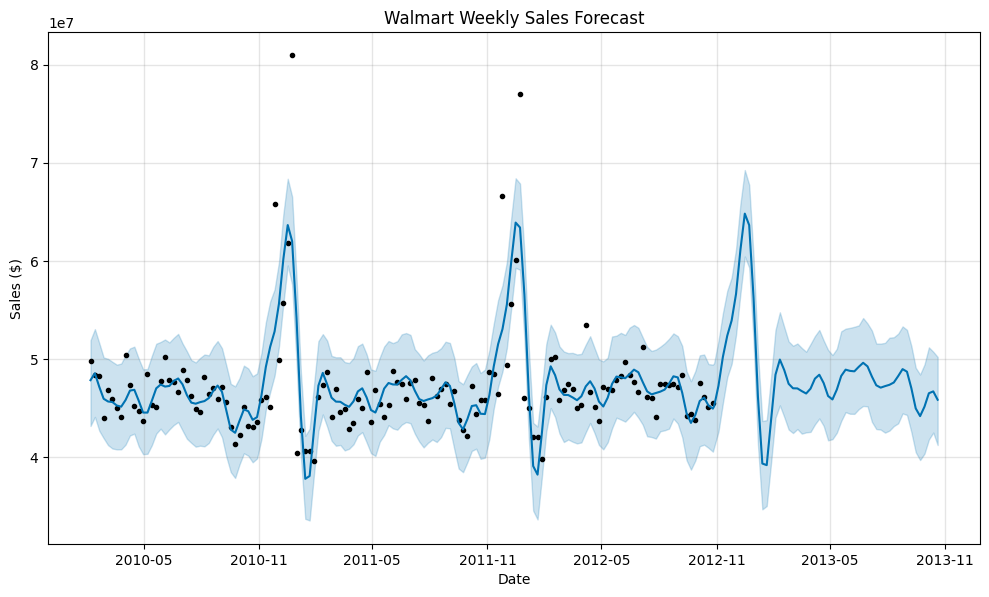

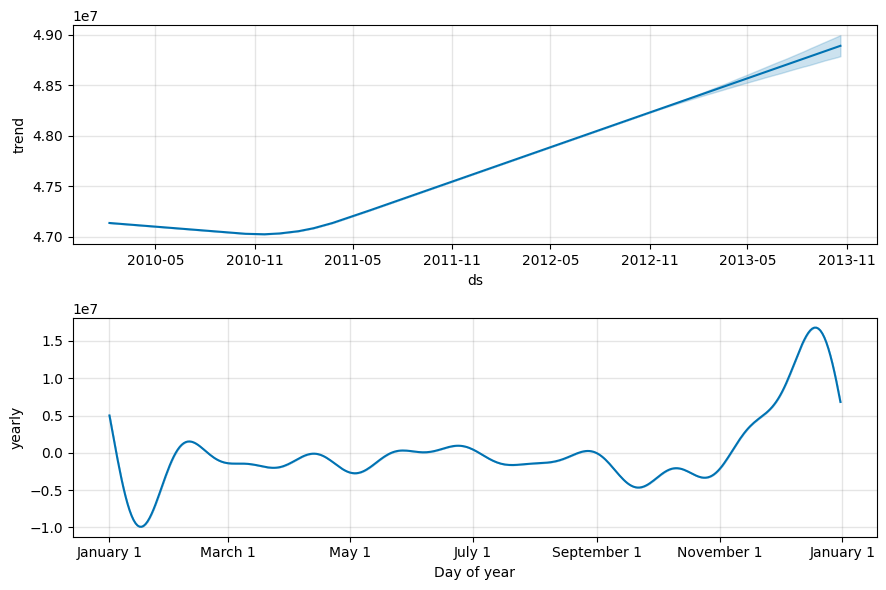

In [14]:
# Plot forecast
model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

# Plot components (trend, yearly pattern)
model.plot_components(forecast)
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Only compare where we have actual data
merged = forecast.set_index('ds').join(df_prophet.set_index('ds'), how='inner')
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 2024316.43
RMSE: 3494327.03
